In [78]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings

In [79]:
df = pd.read_csv('D:/Minor/totalwithmaininfoNEWNEWNEW.csv')
df = df.drop(df.columns[0],axis=1)

In [80]:
df.head()

,EAR,EAR_N,MAR,MAR_N,PUC,PUC_N,MOE,MOE_N,Label
0,0.257930,-0.264316,0.778621,0.682331,0.417689,0.849206,3.018724,0.395741,0
1,0.274627,1.105607,0.745216,-1.147899,0.366795,-1.102199,2.713560,-1.137307,0
2,0.250898,-0.841291,0.774664,0.465568,0.402140,0.252993,3.087563,0.741567,0
3,0.300371,3.217887,0.688505,-4.255129,0.415034,0.747404,2.292181,-3.254179,0
4,0.293565,2.659484,0.704847,-3.359717,0.448924,2.046805,2.400990,-2.707556,0


In [81]:
df["Label"].replace({10: 1}, inplace=True)

In [82]:
#train_percentage = 15/19
#train_index = int(len(df)*train_percentage)
train_index=7160
test_index = len(df)-train_index

In [83]:
#y=df["Label"]

In [84]:
#X=df[["EAR","MAR","PUC","MOE","EAR_N","MAR_N","PUC_N","MOE_N"]]

In [85]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1958,shuffle=True,random_state=42)

In [86]:
df_train = df[:train_index]
df_test = df[-test_index:]
df_train

,EAR,EAR_N,MAR,MAR_N,PUC,PUC_N,MOE,MOE_N,Label
0,0.257930,-0.264316,0.778621,0.682331,0.417689,0.849206,3.018724,0.395741,0
1,0.274627,1.105607,0.745216,-1.147899,0.366795,-1.102199,2.713560,-1.137307,0
2,0.250898,-0.841291,0.774664,0.465568,0.402140,0.252993,3.087563,0.741567,0
3,0.300371,3.217887,0.688505,-4.255129,0.415034,0.747404,2.292181,-3.254179,0
4,0.293565,2.659484,0.704847,-3.359717,0.448924,2.046805,2.400990,-2.707556,0
...,...,...,...,...,...,...,...,...,...
7155,0.296133,2.678521,0.901927,30.327099,0.442319,1.675724,3.045677,-1.623052,1
7156,0.324833,4.155270,0.874365,16.047977,0.477489,3.017775,2.691733,-2.979233,1
7157,0.300075,2.881341,0.866377,11.909637,0.452734,2.073171,2.887201,-2.230274,1
7158,0.304228,3.095007,0.872064,14.855945,0.455013,2.160134,2.866486,-2.309647,1


In [87]:
X_test = df_test.drop(["Label"],axis=1)
Y_test = df_test["Label"]

In [88]:
X_train = df_train.drop('Label',axis=1)
Y_train = df_train['Label']

In [89]:
X_train

,EAR,EAR_N,MAR,MAR_N,PUC,PUC_N,MOE,MOE_N
0,0.257930,-0.264316,0.778621,0.682331,0.417689,0.849206,3.018724,0.395741
1,0.274627,1.105607,0.745216,-1.147899,0.366795,-1.102199,2.713560,-1.137307
2,0.250898,-0.841291,0.774664,0.465568,0.402140,0.252993,3.087563,0.741567
3,0.300371,3.217887,0.688505,-4.255129,0.415034,0.747404,2.292181,-3.254179
4,0.293565,2.659484,0.704847,-3.359717,0.448924,2.046805,2.400990,-2.707556
...,...,...,...,...,...,...,...,...
7155,0.296133,2.678521,0.901927,30.327099,0.442319,1.675724,3.045677,-1.623052
7156,0.324833,4.155270,0.874365,16.047977,0.477489,3.017775,2.691733,-2.979233
7157,0.300075,2.881341,0.866377,11.909637,0.452734,2.073171,2.887201,-2.230274
7158,0.304228,3.095007,0.872064,14.855945,0.455013,2.160134,2.866486,-2.309647


In [90]:
def average(y_pred):
    for i in range(len(y_pred)):
        if i % 240 == 0 or (i+1) % 240 == 0:
            pass
        else: 
            average = float(y_pred[i-1] + y_pred[i] + y_pred[i+1])/3
            if average >= 0.5:
                y_pred[i] = 1
            else:
                y_pred[i] = 0
    return y_pred

# 1. Logistic Regression

In [91]:
# Fitting Logistic Regression Model on training dataset
clf = LogisticRegression().fit(X_train, Y_train)

# Prediction on testing data
y_pred_1 = clf.predict(X_test)

# Averaging out the predictions
y_pred_1 = average(y_pred_1)

# Evaluation
y_score_1 = clf.predict_proba(X_test)[:,1]
acc1 = accuracy_score(Y_test, y_pred_1)
f1_score_1 = metrics.f1_score(Y_test, y_pred_1)
roc_1 = metrics.roc_auc_score(Y_test, y_score_1)

print([acc1,f1_score_1,roc_1])
print(confusion_matrix(Y_test, y_pred_1))

C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.7567708333333333, 0.7463335143943508, 0.7878808593750001]
[[766 194]
 [273 687]]


In [92]:
from sklearn.externals import joblib

joblib_file = "LogReg_model.pkl"
joblib.dump(clf, joblib_file)

['LogReg_model.pkl']

# 2. Naive Bayes

In [93]:
clf_NB = GaussianNB()
clf_NB.fit(X_train, Y_train)

pred_NB = clf_NB.predict(X_test)
pred_NB = average(pred_NB)

y_score_2 = clf_NB.predict_proba(X_test)[:,1]
acc2 = accuracy_score(Y_test, pred_NB)
f1_score_2 = metrics.f1_score(Y_test, pred_NB)
roc_2 = metrics.roc_auc_score(Y_test, y_score_2)

print([acc2,f1_score_2,roc_2])
print(confusion_matrix(Y_test, pred_NB))

[0.6479166666666667, 0.5961768219832736, 0.6516097005208332]
[[745 215]
 [461 499]]


# 3. KNN

In [94]:
acc3_list = []
f1_score3_list = []
roc_3_list = []
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train) 
    pred_KN = neigh.predict(X_test)
    pred_KN = average(pred_KN)
    y_score_3 = neigh.predict_proba(X_test)[:,1]
    acc3_list.append(accuracy_score(Y_test, pred_KN))
    f1_score3_list.append(metrics.f1_score(Y_test, pred_KN))
    roc_3_list.append(metrics.roc_auc_score(Y_test, y_score_3))

In [95]:
acc3_list.index(max(acc3_list))+1

26

In [96]:
neigh = KNeighborsClassifier(n_neighbors=acc3_list.index(max(acc3_list))+1)
neigh.fit(X_train, Y_train) 
pred_KN = neigh.predict(X_test)
pred_KN = average(pred_KN)
y_score_3 = neigh.predict_proba(X_test)[:,1]
acc3 = accuracy_score(Y_test, pred_KN)
f1_score_3 = metrics.f1_score(Y_test, pred_KN)
roc_3 = metrics.roc_auc_score(Y_test, y_score_3)
print([acc3,f1_score_3,roc_3])
print(confusion_matrix(Y_test, pred_KN))

[0.6515625, 0.6766553890768486, 0.6170030381944445]
[[551 409]
 [260 700]]


# 4. MLP

In [97]:
F1_score_4_list = []
acc4_list = []
roc_4_list = []
mlp = []
# CAN ADD MAX_ITER parameter
hidden_units = [10,20,30,40,50,60,70]
optimizer = ['sgd','adam','lbfgs']
activation = ['logistic','tanh','relu']
for j in activation:
    for i in optimizer:
        for k in hidden_units:
            clf_MLP = MLPClassifier(hidden_layer_sizes= k, activation =  j, solver= i)
            clf_MLP.fit(X_train, Y_train)
            pred_MLP = clf_MLP.predict(X_test)
            pred_MLP = average(pred_MLP)
            y_score_4 = clf_MLP.predict_proba(X_test)[:,1]
            acc4_list.append(accuracy_score(Y_test,pred_MLP))
            roc_4_list.append(metrics.roc_auc_score(Y_test, y_score_4))
            F1_score_4_list.append(metrics.f1_score(Y_test, pred_MLP))
            mlp.append([j,i,k])

C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

In [98]:
print("Best Accuracy: ", max(acc4_list))
min_index = acc4_list.index(max(acc4_list))
print("Best Combination:", mlp[min_index])

Best Accuracy:  0.8020833333333334
Best Combination: ['relu', 'sgd', 50]


In [99]:
clf_MLP = MLPClassifier(hidden_layer_sizes= mlp[min_index][2], activation =  mlp[min_index][0], solver= mlp[min_index][1])
clf_MLP.fit(X_train, Y_train)
pred_MLP = clf_MLP.predict(X_test)
pred_MLP = average(pred_MLP)
y_score_4 = clf_MLP.predict_proba(X_test)[:,1]
acc4 = accuracy_score(Y_test,pred_MLP)
f1_score_4 = metrics.f1_score(Y_test, pred_MLP)
roc_4 = metrics.roc_auc_score(Y_test, y_score_4)
print([acc4,f1_score_4,roc_4])
print(confusion_matrix(Y_test, pred_MLP))

[0.68125, 0.7262969588550984, 0.6942154947916666]
[[496 464]
 [148 812]]


C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# 5. Decision Tree

In [100]:
acc5=[]
max_depth = []
for i in [2,3,4,5,6,7,8,9,10]:
    clf_DT = DecisionTreeClassifier(random_state=0, max_depth = i)
    clf_DT.fit(X_train, Y_train)
    pred_DT = clf_DT.predict(X_test)
    pred_DT = average(pred_DT)
    acc5.append(accuracy_score(pred_DT, Y_test))
    max_depth.append(i)
print (max(acc5))

0.6541666666666667


In [101]:
best_depth = max_depth[acc5.index(max(acc5))]
best_depth

5

In [102]:
clf_DT = DecisionTreeClassifier(random_state=0, max_depth = best_depth)
clf_DT.fit(X_train, Y_train)
pred_DT = clf_DT.predict(X_test)
pred_DT = average(pred_DT)
y_score_5 = clf_DT.predict_proba(X_test)[:,1]
acc5 = accuracy_score(Y_test, pred_DT)
f1_score_5 = metrics.f1_score(Y_test, pred_DT)
roc_5 = metrics.roc_auc_score(Y_test, y_score_5)
print([acc5,f1_score_5,roc_5])
print(confusion_matrix(Y_test, pred_DT))

[0.6541666666666667, 0.6422413793103449, 0.6460026041666665]
[[660 300]
 [364 596]]


# 6. Random Forest

In [103]:
acc6=[]
max_depth = []
for i in range(1,10):
    clf_RF = RandomForestClassifier(max_depth=i)
    clf_RF.fit(X_train, Y_train) 
    pred_RF = clf_RF.predict(X_test)
    pred_RF = average(pred_RF)
    acc6.append(accuracy_score(pred_RF, Y_test))
    max_depth.append(i)
print (max(acc6))

C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

0.6692708333333334


In [104]:
best_depth_6 = max_depth[acc6.index(max(acc6))]
best_depth_6

5

In [105]:
clf_RF = RandomForestClassifier(max_depth=best_depth_6)
clf_RF.fit(X_train, Y_train) 
pred_RF = clf_RF.predict(X_test)
pred_RF = average(pred_RF)
y_score_6 = clf_RF.predict_proba(X_test)[:,1]
acc6 = accuracy_score(Y_test, pred_RF)
f1_score_6 = metrics.f1_score(Y_test, pred_RF)
roc_6 = metrics.roc_auc_score(Y_test, y_score_6)
print([acc6,f1_score_6,roc_6])
print(confusion_matrix(Y_test, pred_RF))

feature_importances = pd.DataFrame(clf_RF.feature_importances_,index = X_train.columns,columns=['Importance']).sort_values('Importance',ascending=False)

C:\Users\Sagar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.6755208333333333, 0.7169468423443889, 0.6484445529513889]
[[508 452]
 [171 789]]


# 7. XGBoost

In [106]:
import xgboost
from xgboost import XGBClassifier

clf_XGB = XGBClassifier()
clf_XGB.fit(X_train, Y_train)
pred_XGB = clf_XGB.predict(X_test)
pred_XGB = average(pred_XGB)
y_score_8 = clf_XGB.predict_proba(X_test)[:,1]
acc8 = accuracy_score(Y_test,pred_XGB)
f1_score_8 = metrics.f1_score(Y_test, pred_XGB)
roc_8 = metrics.roc_auc_score(Y_test, y_score_8)
print([acc8,f1_score_8,roc_8])
print(confusion_matrix(Y_test, pred_XGB))

[0.671875, 0.6974063400576369, 0.6789860026041667]
[[564 396]
 [234 726]]


In [107]:
feature_importances

,Importance
MOE_N,0.196819
PUC_N,0.172176
EAR_N,0.129307
MAR_N,0.128964
MAR,0.114888
MOE,0.094561
EAR,0.092264
PUC,0.071022


In [108]:
X_train_shaped = np.expand_dims(X_train, axis=2)
X_train_shaped.shape

(7160, 8, 1)

In [109]:
X_test_shaped = np.expand_dims(X_test, axis=2)
X_test_shaped.shape

(1920, 8, 1)

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Conv1D(64, kernel_size = 3, activation = 'relu', input_shape = (8,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

optimizer = Adam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X_train_shaped, Y_train, validation_data = (X_test_shaped,Y_test), epochs = 100)

Epoch 1/100
224/224 [==============================] - 2s 7ms/step - loss: 0.9081 - accuracy: 0.4659 - val_loss: 0.8802 - val_accuracy: 0.4349
Epoch 2/100
224/224 [==============================] - 1s 4ms/step - loss: 0.7708 - accuracy: 0.5254 - val_loss: 0.7823 - val_accuracy: 0.4839
Epoch 3/100
224/224 [==============================] - 1s 3ms/step - loss: 0.6874 - accuracy: 0.6035 - val_loss: 0.7496 - val_accuracy: 0.5354
Epoch 4/100
224/224 [==============================] - 1s 3ms/step - loss: 0.6530 - accuracy: 0.6682 - val_loss: 0.7337 - val_accuracy: 0.6000
Epoch 5/100
224/224 [==============================] - 1s 3ms/step - loss: 0.6316 - accuracy: 0.7025 - val_loss: 0.7341 - val_accuracy: 0.6099
Epoch 6/100
224/224 [==============================] - 1s 4ms/step - loss: 0.6212 - accuracy: 0.7144 - val_loss: 0.7355 - val_accuracy: 0.6135
Epoch 7/100
224/224 [==============================] - 1s 3ms/step - loss: 0.6105 - accuracy: 0.7223 - val_loss: 0.7352 - val_accuracy: 0.6182

In [111]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                12320     
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
__________________________________________________

In [112]:
pred_cnn = model.predict_classes(X_test_shaped)
pred_cnn = average(pred_cnn)
y_score_7 = model.predict_proba(X_test_shaped)
acc7 = accuracy_score(Y_test, np.array(pred_cnn))
f1_score_7 = metrics.f1_score(Y_test, pred_cnn)
roc_7 = metrics.roc_auc_score(Y_test, y_score_7)
print([acc7,f1_score_7,roc_7])
print(confusion_matrix(Y_test, pred_cnn))

[0.665625, 0.7186678352322524, 0.6837207031249999]
[[458 502]
 [140 820]]


,Accuracy
Model,
Logistic Regression,0.756771
Naive Bayes,0.647917
KNN,0.651563
MLP,0.681250
Decision Tree,0.654167
Random Forest,0.675521
CNN,0.665625
XGB Boosting,0.671875


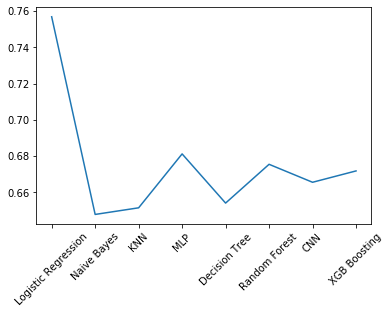

In [113]:
acc_total = {'Model':['Logistic Regression','Naive Bayes', 'KNN', 'MLP','Decision Tree','Random Forest', 'CNN', 'XGB Boosting'],
        'Accuracy':[acc1,acc2, acc3, acc4, acc5,acc6,acc7, acc8]}
acc_total=pd.DataFrame(acc_total)
acc_total=acc_total.set_index('Model')
acc_total
plt.plot(acc_total['Accuracy'])
plt.xticks(rotation=45)
acc_total